<a href="https://colab.research.google.com/github/vidakpop/Dow-component-based-on-their-distance-in-the-PCA-loading-matrix/blob/main/Dow_components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install yahoo_fin

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

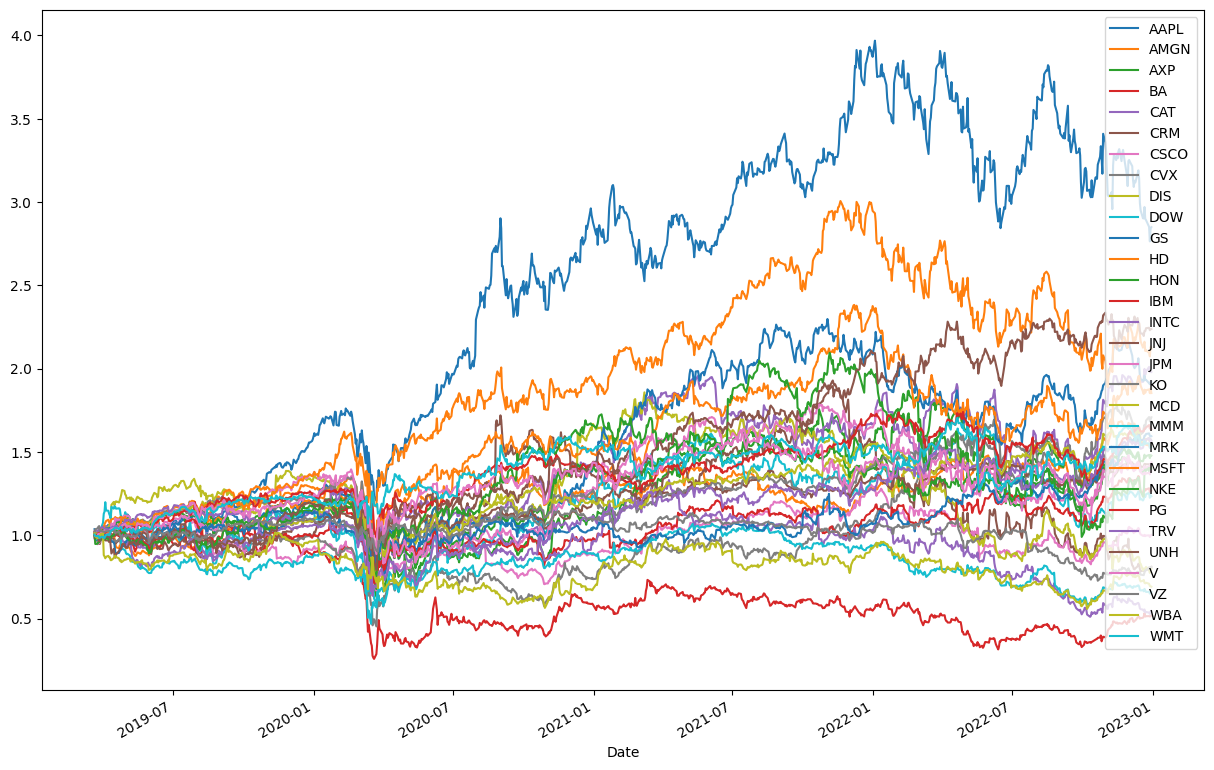

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']
start_date = '2019-01-01'
end_date = '2022-12-31'

history_data = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    history_data[ticker] = data['Adj Close']

history_data.dropna(inplace=True)

# Calculate cumulative returns manually
returns_data = (history_data.pct_change() + 1).cumprod()

# Plot cumulative returns
returns_data.plot(figsize=(15, 10))
plt.show()


In [19]:
#performing PCA
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA()
# Drop rows with missing values
returns_data.dropna(inplace=True)

# Perform PCA on the modified data
pca.fit(returns_data)
pca_loading_matrix = pca.components_.T


# Fit PCA on the return data
pca.fit(returns_data)

# Get the PCA loading matrix
pca_loading_matrix = pca.components_.T


In [20]:
from sklearn.cluster import KMeans

# Choose the number of clusters (k)
k = 4

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_loading_matrix)

# Get the cluster labels
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Analyze the clusters
for i in range(k):
    cluster_stocks = [tickers[j] for j in range(len(tickers)) if labels[j] == i]
    print(f"Cluster {i+1}: {cluster_stocks}")


Cluster 1: ['CSCO']
Cluster 2: ['BA', 'CRM', 'DOW', 'VZ']
Cluster 3: ['INTC']
Cluster 4: ['AAPL', 'AMGN', 'AXP', 'CAT', 'CVX', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'WBA', 'WMT']
